In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Asignación de Masas 

In [27]:
import numpy as np
import random

N = 10  #número de partículas
random.seed(17)

sample = np.arange(0,1,1e-5)

x = random.sample(sample, N)
y = random.sample(sample, N)

x = np.asarray(x)
y = np.asarray(y)

In [28]:
nx = 3 #numero de celdas
ny = 3

xgrid = np.linspace(0,1,nx+1) #posicion de las lineas de nodos
ygrid = np.linspace(0,1,ny+1)

dx = 1./nx
dy = 1./ny

print dx, dy

0.333333333333 0.333333333333


/home/omarioni/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


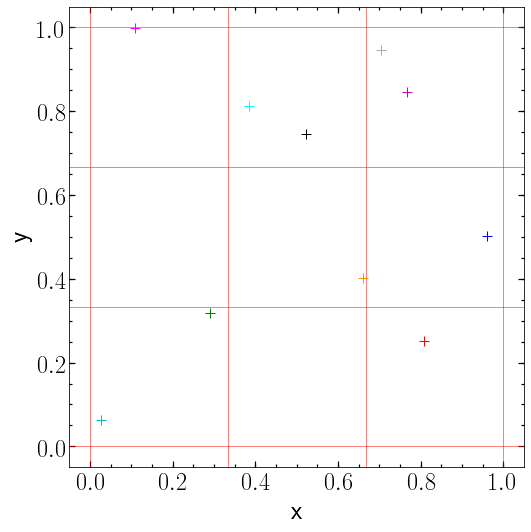

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

col = ('k', 'r', 'b', 'g','m','darkgray', 'darkorange', 'magenta', 'c', 'cyan')

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
for i in range(nx+1):
    ax.axvline(x = xgrid[i],ls='-', color='r', lw=0.5)
    ax.axhline(y = ygrid[i],ls='-', color='r', lw=0.5)

for i in range(N):
    ax.plot(x[i],y[i],'+k', markersize=10, color = col[i])

ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel('x', fontsize=26)
ax.set_ylabel('y',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## NGP 

In [37]:
nxgrid = np.int_(x*nx)
nygrid = np.int_(y*ny)

print nxgrid, nygrid

h = nxgrid*ny + nygrid 

h = np.int_(h) #esto nos dice a que numero de grid total corresponde cada conjunto nxgrid, ygrid

print h
print h.min(), h.max()


[1 2 2 0 2 2 1 0 0 1] [2 0 1 0 2 2 1 2 0 2]
[5 6 7 0 8 8 4 2 0 5]
0 8


Definimos un vector masas para sumar las masas en cada celda

In [38]:
random.seed(29)
# masas = random.sample(sample, N)
# masas = np.asarray(masas)*10
masas=np.ones(N)
print masas

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Acá sumamos las masas de las particulas de cada celda

In [39]:
count = np.zeros(nx*ny)

for i in range(0,len(h)):
    count[h[i]] = count[h[i]] + masas[i] 

print count

[2. 0. 1. 0. 1. 2. 1. 1. 2.]


## CIC 

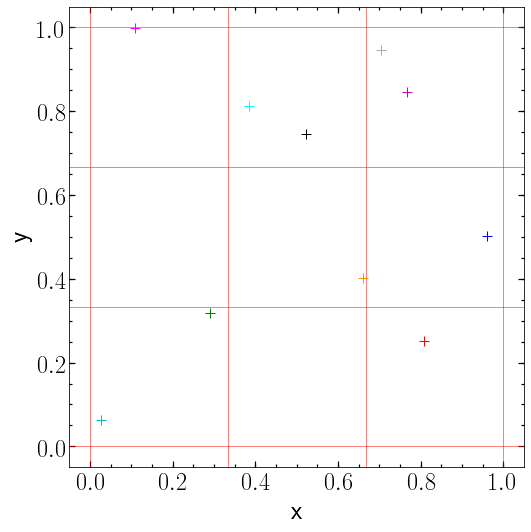

In [41]:
import matplotlib
import matplotlib.pyplot as plt
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


col = ('k', 'r', 'b', 'g','m','darkgray', 'darkorange', 'magenta', 'c', 'cyan')
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
for i in range(nx+1):
    ax.axvline(x = xgrid[i],ls='-', color='r', lw=0.5)
    ax.axhline(y = ygrid[i],ls='-', color='r', lw=0.5)

for i in range(N):
    ax.plot(x[i],y[i],'+k', markersize=10, color = col[i])

ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel('x', fontsize=26)
ax.set_ylabel('y',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

Definimos un vector masas para sumar las masas en cada celda

In [42]:
random.seed(29)
# masas = random.sample(sample, N)
# masas = np.asarray(masas)*10
masas=np.ones(N)
print masas

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [43]:
nxgrid = np.int_(x*nx)
nygrid = np.int_(y*ny)

print nxgrid, nygrid

[1 2 2 0 2 2 1 0 0 1] [2 0 1 0 2 2 1 2 0 2]


In [44]:
distx = np.zeros(N)
disty = np.zeros(N)
sgx = np.zeros(N)
sgy = np.zeros(N)

for i in range(N):
    w = x[i] - xgrid
    distx_aux = abs(w)
    distx[i] = distx_aux.min()
    p = distx_aux.argmin()
    sgx[i] = np.sign(w[p])
print sgx
print distx

print '------------------------------------'

for i in range(N):
    w = y[i] - ygrid
    disty_aux = abs(w)
    disty[i] = disty_aux.min()
    p = disty_aux.argmin()
    sgy[i] = np.sign(w[p])
print sgy
print disty


[-1.  1. -1. -1.  1.  1. -1.  1.  1.  1.]
[0.14468667 0.14002333 0.03951    0.04371333 0.09943333 0.03754333
 0.00528667 0.11016    0.02693    0.05083667]
------------------------------------
[ 1. -1. -1. -1. -1. -1.  1. -1.  1.  1.]
[0.07972333 0.08095333 0.16506667 0.01590333 0.15368    0.05481
 0.06825667 0.00156    0.06219    0.14593333]


In [46]:
# masas=np.ones(N)
count = np.zeros((nx,ny))

# print count

LX = (distx + dx/2.)/dx
LY = (disty + dy/2.)/dy

for k in range(N):
    
    #region de la particula
    i_ = np.int(x[k]*nx)
    j_ = np.int(y[k]*ny)
    
    i = i_%nx
    j = j_%ny
    count[i,j] = count[i,j] + masas[k] * LX[k] * LY[k]
    
    #lado en x donde no esta la particula
    i_ = np.int((x[k]-sgx[k]*dx/2.)*nx)
    j_ = np.int(y[k]*ny)
    
    i = i_%nx
    j = j_%ny
    count[i,j] = count[i,j] + masas[k] * (1.-LX[k]) * LY[k]
    
    #lado en y donde no esta la particula 
    i_ = np.int(x[k]*nx)
    j_ = np.int((y[k]-sgy[k]*dy/2.)*ny)
    
    i = i_%nx
    j = j_%ny
    count[i,j] = count[i,j] + masas[k] * LX[k] * (1.-LY[k])

    #diagonal (donde NO esta la particula)
    i_ = np.int((x[k]-sgx[k]*dx/2.)*nx)
    j_ = np.int((y[k]-sgy[k]*dy/2.)*ny)
    
    i = i_%nx
    j = j_%ny
    count[i,j] = count[i,j] + masas[k] * (1.-LX[k]) * (1.-LY[k])    

print count

[[1.84100169 0.68671113 0.83238718]
 [0.55155044 0.83516453 1.75357503]
 [1.06309787 1.21055433 1.2259578 ]]


## TSC

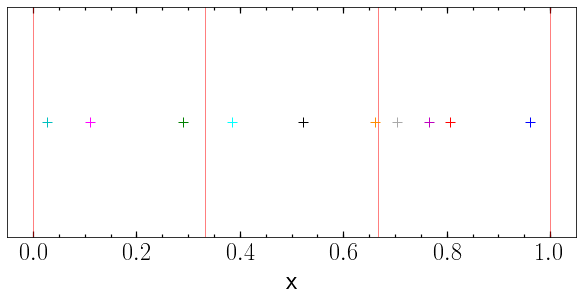

In [29]:
import matplotlib
import matplotlib.pyplot as plt
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


col = ('k', 'r', 'b', 'g','m','darkgray', 'darkorange', 'magenta', 'c', 'cyan')
fig=plt.figure(1, figsize=(10,4))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
for i in range(nx+1):
    ax.axvline(x = xgrid[i],ls='-', color='r', lw=0.5)

for i in range(N):
    ax.plot(x[i],0,'+k', markersize=10, color = col[i])

ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,0.05)
ax.set_yticks([])

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel('x', fontsize=26)

# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

Definimos un vector masas para sumar las masas en cada celda

In [30]:
random.seed(29)
# masas = random.sample(sample, N)
# masas = np.asarray(masas)*10
masas=np.ones(N)
print masas

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
nxgrid = np.int_(x*nx)

print nxgrid

[1 2 2 0 2 2 1 0 0 1]


In [32]:
distx = np.zeros(N)
sgx = np.zeros(N)

for i in range(N):
    w = x[i] - xgrid
    distx_aux = abs(w)
    distx[i] = distx_aux.min()
    p = distx_aux.argmin()
    sgx[i] = np.sign(w[p])

print sgx
print distx


[-1.  1. -1. -1.  1.  1. -1.  1.  1.  1.]
[0.14468667 0.14002333 0.03951    0.04371333 0.09943333 0.03754333
 0.00528667 0.11016    0.02693    0.05083667]


In [34]:
# masas=np.ones(N)
count = np.zeros(nx)

# print count

for k in range(N):
    
    #area mas grande
    i_ = np.int((x[k]-sgx[k]*dx)*nx)
    i = i_%nx
    
    area_3 = 0.5*(1.-distx[k]/dx)**2
    
    count[i] = count[i] + masas[k] * area_3
    
    #area mas chica
    i_ = np.int((x[k]+sgx[k]*dx)*nx)
    i = i_%nx
    
    area_1 = 0.5*(distx[k]/dx)**2
    
    count[i] = count[i] + masas[k] * area_1
        
    #area de la particula
    i_ = np.int(x[k]*nx)
    i = i_%nx
    
    area_2 = 1.-area_3-area_1
    
    count[i] = count[i] + masas[k] * area_2

print count

[3.54567687 3.14093024 3.31339289]
